<a href="https://colab.research.google.com/github/saniya1027108/Satellite-image-classification/blob/main/Satellite_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow.keras.layers import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/PROJECTS/satellite image classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_1566.jpg
/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_2623.jpg
/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_2416.jpg
/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_348.jpg
/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_717.jpg
/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_697.jpg
/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_921.jpg
/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_751.jpg
/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_880.jpg
/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_763.jpg
/content/drive/MyDrive/PROJECTS/satellite imag

In [5]:
image_dir = '/content/drive/MyDrive/PROJECTS/satellite image classification'

In [6]:
import os 

# Walkthrough directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/PROJECTS/satellite image classification"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 1 directories and 0 images in '/content/drive/MyDrive/PROJECTS/satellite image classification'. 
There are 4 directories and 0 images in '/content/drive/MyDrive/PROJECTS/satellite image classification/data'. 
There are 0 directories and 1510 images in '/content/drive/MyDrive/PROJECTS/satellite image classification/data/water'. 
There are 0 directories and 1500 images in '/content/drive/MyDrive/PROJECTS/satellite image classification/data/green_area'. 
There are 0 directories and 1500 images in '/content/drive/MyDrive/PROJECTS/satellite image classification/data/cloudy'. 
There are 0 directories and 1131 images in '/content/drive/MyDrive/PROJECTS/satellite image classification/data/desert'. 


In [7]:
classes = []
for dir in os.listdir("/content/drive/MyDrive/PROJECTS/satellite image classification/data"):
  classes.append(dir)

len(classes)

4

In [8]:
water = os.listdir(image_dir + '/data/water')
green_area = os.listdir(image_dir + '/data/green_area')
cloudy = os.listdir(image_dir + '/data/cloudy')
desert = os.listdir(image_dir + '/data/desert')


In [9]:
import pathlib
image_dir = pathlib.Path("/content/drive/MyDrive/PROJECTS/satellite image classification/data")
class_names = np.array(sorted([item.name for item in image_dir.glob("*")]))
print(class_names)

['cloudy' 'desert' 'green_area' 'water']


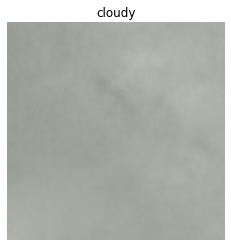

In [10]:
import random
labels = os.listdir(image_dir)
random_label = random.choice(labels)
path = os.path.join(image_dir, random_label)
file_path = os.path.join(path, random.choice(os.listdir(path)))

img = plt.imread(file_path)
plt.imshow(img)
plt.title(random_label, color = "black")
plt.axis(False);

In [13]:
all_files = []
for elem in os.listdir(image_dir):
  path = os.path.join(image_dir, elem)
  for x in os.listdir(path):
    img_path = os.path.join(path, x)
    all_files.append(img_path)

all_files[:10]

['/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_2287.jpg',
 '/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_2995.jpg',
 '/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_1619.jpg',
 '/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_1415.jpg',
 '/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_2940.jpg',
 '/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_2532.jpg',
 '/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_2243 (1).jpg',
 '/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_2447.jpg',
 '/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_264.jpg',
 '/content/drive/MyDrive/PROJECTS/satellite image classification/data/water/SeaLake_2229.jpg']

In [14]:
len(all_files)

5641

In [15]:
#Image Preprocessing
Image_size = (224,244)

def load_and_prep(filepath, normalize=False):

  #Read the image file
  img = tf.io.read_file(filepath)
  #converting into tensors
  img = tf.io.decode_image(img)
  #resize image
  img = tf.image.resize(img, Image_size)
  #Normalizing the Image
  if normalize:
    img = img/255

  return img

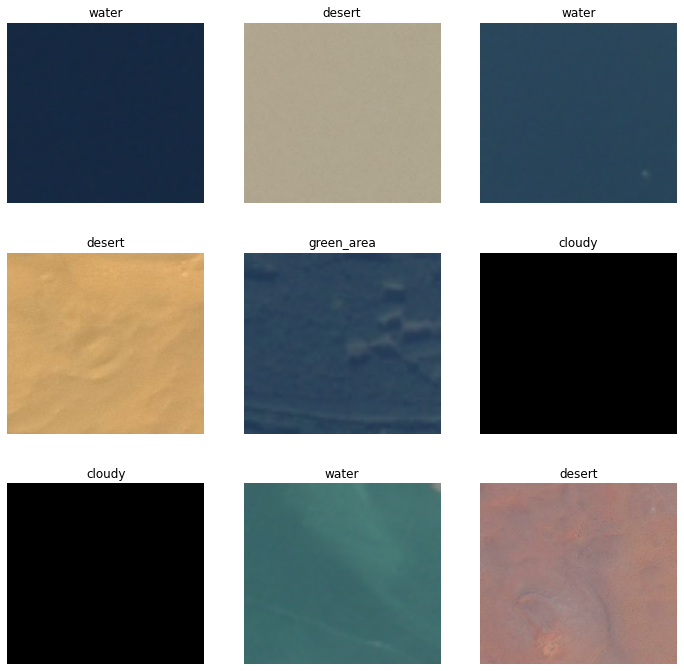

In [16]:
# Plotting multiple random images
plt.figure(figsize=(12, 12))
for i in range(9):
  random_img_path = random.choice(all_files)
  random_label = random_img_path.split("/")[7]
  img = load_and_prep(random_img_path, normalize=True)

  # Plotting the images
  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(random_label, color="black")
  plt.axis(False);

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    image_dir,
    target_size=(224 , 224),
    batch_size= 32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    image_dir, # same directory as training data
    target_size=(224, 224),
    batch_size= 32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3949 images belonging to 4 classes.
Found 1692 images belonging to 4 classes.


Model 1 (VGG16)

In [12]:
from tensorflow.keras.layers.experimental import preprocessing

In [13]:
# Creating data augmentation layer
data_augmentation = tf.keras.Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomZoom(0.2),
   preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name="data_augmentation_layer")

In [14]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setting up input layer
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x) 
model = tf.keras.Model(inputs, outputs)

# compiling the model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



16719872/16705208 [==============================] - 0s 0us/step


In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 5,124
Non-trainable

In [17]:
# fit the model
history_3 = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 10 )

Epoch 1/10
124/124 [==============================] - 75s 605ms/step - loss: 1.3971 - accuracy: 0.2666 - val_loss: 1.3835 - val_accuracy: 0.2677
Epoch 2/10
124/124 [==============================] - 77s 622ms/step - loss: 1.3908 - accuracy: 0.2623 - val_loss: 1.3802 - val_accuracy: 0.2677
Epoch 3/10
124/124 [==============================] - 74s 594ms/step - loss: 1.3892 - accuracy: 0.2692 - val_loss: 1.3793 - val_accuracy: 0.2677
Epoch 4/10
124/124 [==============================] - 73s 591ms/step - loss: 1.3911 - accuracy: 0.2629 - val_loss: 1.3800 - val_accuracy: 0.2677
Epoch 5/10
124/124 [==============================] - 74s 600ms/step - loss: 1.3922 - accuracy: 0.2631 - val_loss: 1.3828 - val_accuracy: 0.2677
Epoch 6/10
124/124 [==============================] - 73s 593ms/step - loss: 1.3972 - accuracy: 0.2684 - val_loss: 1.3811 - val_accuracy: 0.2660
Epoch 7/10
124/124 [==============================] - 74s 601ms/step - loss: 1.3993 - accuracy: 0.2654 - val_loss: 1.3798 - val_ac

Model 2

In [19]:
train_generator = train_datagen.flow_from_directory(
    image_dir,
    target_size=(64 , 64),
    batch_size= 32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    image_dir, # same directory as training data
    target_size=(64, 64),
    batch_size= 32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3949 images belonging to 4 classes.
Found 1692 images belonging to 4 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
model_2=Sequential()
model_2.add(Conv2D(33,(3,3),strides = 2,activation = 'relu',padding = 'valid',input_shape=(64,64,3)))  #32 is the filter,3,3 is the size of the each filter
model_2.add(Conv2D(45,(3,3),strides = 2,activation = 'relu',padding = 'same'))     ## before  conv we should use batchN since we did 1./255 we can use BN after conv.
# model.add(BatchNormalization())
model_2.add(MaxPooling2D(2,2))
model_2.add(Flatten())                              ## 64,64,3 is for colord image           #padding = valid .it reduceses the shape size 
# model.add(Dropout(0.1))
model_2.add(Dense(84,activation = 'sigmoid')) 
model_2.add(Dense(60,activation = 'relu'))
model_2.add(Dense(4,activation = 'softmax'))  
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 33)        924       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 45)        13410     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 45)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2880)              0         
                                                                 
 dense (Dense)               (None, 84)                242004    
                                                                 
 dense_1 (Dense)             (None, 60)                5100      
                                                        

In [21]:
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [1]:
history=model_2.fit(train_generator,
          validation_data=validation_generator,
          epochs=20)

NameError: ignored

In [22]:
model_2.evaluate(train_generator)

124/124 [==============================] - 12s 96ms/step - loss: 0.1943 - accuracy: 0.9220


[0.19429726898670197, 0.9220055937767029]

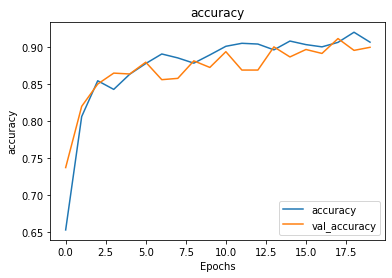

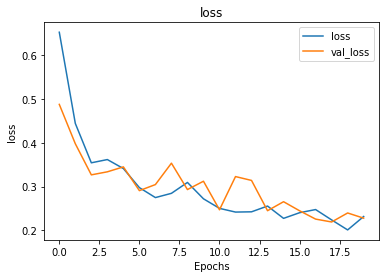

In [23]:
def plot_graphs(model_2, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [24]:
#classes names 
class_name = {0:"cloud",1:"desert" , 2 : 'green_area', 3: 'water'}


In [25]:
#predict test data
y = model.predict(validation_generator)
y =  np.argmax(y,axis= 1 )
y

array([3, 3, 3, ..., 3, 3, 3])

In [26]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in validation_generator:
  i += 1
  y = np.argmax(model_2.predict(data), axis=1)
  y_true = np.append(y_true, labels)
  y_pred = np.append(y_pred, y)
  
  if i == validation_generator.samples // 32 + 1:
    break

In [27]:
print(y_true)
print(y_pred)

[1. 0. 0. ... 1. 0. 0.]
[0. 0. 3. ... 2. 2. 1.]


In [28]:
from sklearn.metrics import confusion_matrix , classification_report

In [29]:
cm  = confusion_matrix(y_pred,y_true)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
seaborn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

ValueError: ignored